# Final Project - Bayesian Estimator


**Input Dataset:**
1. seizure_epilepsy.json

**Goal:** to build up Bayesian Network and DAG.


## Table of Content:

1. Import preperation\
    1.1 Import modules\
    1.2 Load data\
    1.3 Data cleaning
        1.31 Remove duplicated rows
        1.32 One-hot encoding on clinicalSynopsis
        1.33 Remove records with empty clinicalSynopsis
        1.34 Remove duplciated columns
        1.35 Remove values rather than 1 and 0
    1.4 Extract data for ontology
2. Model buiding\
    2.1 Build the bayesian Network\
    2.2 Learn the model parameters from the data\
    2.3 Query the network without evidence\
    2.4 Query the network with evidence\
    2.5 DAG
3. Data export

# 1. Import preperation

## 1.1 Import modules

## 1.2 Load data

In [3]:
import pandas as pd
import json

!pip install pgmpy
import pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [4]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your JSON file
json_file_path = '/content/drive/My Drive/ColabNotebooks/BIOMEDIN210/FinalProject/seizure_epilepsy.json'

# Read JSON data
with open(json_file_path, 'r') as f:
    data = json.load(f)

# Convert JSON data to DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

Mounted at /content/drive
      mimNumber                                     preferredTitle  \
0        300088  DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...   
1        300491  EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...   
2        300607  DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...   
3        300672  DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...   
4        300884  DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...   
...         ...                                                ...   
1967     620653  INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...   
1968     620655                            ALFADHEL SYNDROME; AFDL   
1969     620669  NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...   
1970     620675         LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27   
1971     620688  INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...   

                                       clinicalSynopsis  
0     [Delayed development, variable severity, from ...  
1     [Macrocepha

In [5]:
# # Import the json file
# def json_to_dataframe(json_file):
#     # Read JSON data
#     with open(json_file, 'r') as f:
#         data = json.load(f)

#     # Convert to DataFrame
#     df = pd.DataFrame(data)

#     return df


# df = json_to_dataframe(r'C:\Users\s0343149\Documents\Training\BMI\BIOMEDIN210\Homework\Final Project\seizure_epilepsy.json')

# # Check results
# df

In [6]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mimNumber         1972 non-null   int64 
 1   preferredTitle    1972 non-null   object
 2   clinicalSynopsis  1972 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.3+ KB


## 1.3 Data cleaning

### 1.31 Remove duplicated rows

In [7]:
# Check duplication
df.duplicated(subset=['mimNumber']).sum()

256

In [8]:
# Drop duplicated records
df1 = df.drop_duplicates(subset=['mimNumber']).reset_index(drop=True)

# Check info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mimNumber         1716 non-null   int64 
 1   preferredTitle    1716 non-null   object
 2   clinicalSynopsis  1716 non-null   object
dtypes: int64(1), object(2)
memory usage: 40.3+ KB


### 1.32 One-hot encoding on clinicalSynopsis

In [9]:
# Remove mimNumber column
df2 = df1[['preferredTitle', 'clinicalSynopsis']]

# Check results
df2

,preferredTitle,clinicalSynopsis
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,"[Delayed development, variable severity, from ..."
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...","[Macrocephaly, Seizures, Complex partial epile..."
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,"[Hypertonia, Exaggerated startle response, Sei..."
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,"[Microcephaly, progressive, Broad forehead, Pr..."
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,"[Microcephaly, Dysmorphic facial features, Coa..."
...,...,...
1711,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...","[Dysmorphic facial features, Optic atrophy, De..."
1712,ALFADHEL SYNDROME; AFDL,"[Short stature, Decreased body weight, Decreas..."
1713,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,"[Poor overall growth, Failure to thrive, Micro..."
1714,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27","[Short stature, Poor overall growth, Head titu..."


In [10]:
# Splitting the strings in 'clinicalSynopsis' into individual labels and creating a new DataFrame
expanded_df= df2['clinicalSynopsis'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('label')

# Check results
expanded_df

<ipython-input-10-75f242c593f6>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  expanded_df= df2['clinicalSynopsis'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('label')


,label
0,"Delayed development, variable severity, from b..."
0,Developmental regression in about 50% of patients
0,Normal development in some patients
0,"Seizures, convulsive"
0,"Seizures, tonic-clonic"
...,...
1715,Onset in infancy
1715,Variable manifestations
1715,Variable severity
1715,De novo mutation


In [11]:
expanded_df.index.nunique()

1660

In [12]:
# Calculate the discrepancy amoung df2 AND expanded_df
1716-1660


## This is because there are empty cell in clinicalSynopsis in df2. Will remove this records later

56

In [13]:
# One-hot encoding the labels
one_hot_encoded = pd.get_dummies(expanded_df, prefix='', prefix_sep='')

# Check results
one_hot_encoded

,'Ballooned' neurons with autofluorescent fine granular material,'Birdlike' facies,'Bulging' epiphyses,'Bulging' of the costochondral junction,'Burr cells','Butterfly-like' contour of midbrain seen on MRI,'Carp-like' mouth,'Crab sign','Curvilinear profiles' ultrastructurally,'Curvilinear profiles' ultrastructurally in cells,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Group by index and sum up rows with the same index
summed_up_rows = one_hot_encoded.groupby(one_hot_encoded.index).sum()

# Check results
summed_up_rows

,'Ballooned' neurons with autofluorescent fine granular material,'Birdlike' facies,'Bulging' epiphyses,'Bulging' of the costochondral junction,'Burr cells','Butterfly-like' contour of midbrain seen on MRI,'Carp-like' mouth,'Crab sign','Curvilinear profiles' ultrastructurally,'Curvilinear profiles' ultrastructurally in cells,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Concatenating the one-hot encoded DataFrame with the 'preferredTitle' column
df3 = pd.concat([df2['preferredTitle'], summed_up_rows], axis=1)

# Check results
df3

,preferredTitle,'Ballooned' neurons with autofluorescent fine granular material,'Birdlike' facies,'Bulging' epiphyses,'Bulging' of the costochondral junction,'Burr cells','Butterfly-like' contour of midbrain seen on MRI,'Carp-like' mouth,'Crab sign','Curvilinear profiles' ultrastructurally,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,ALFADHEL SYNDROME; AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1714,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Remove "'" symbol from column names
df3.columns = df3.columns.str.replace("'", "")

# Check result
df3

,preferredTitle,Ballooned neurons with autofluorescent fine granular material,Birdlike facies,Bulging epiphyses,Bulging of the costochondral junction,Burr cells,Butterfly-like contour of midbrain seen on MRI,Carp-like mouth,Crab sign,Curvilinear profiles ultrastructurally,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,ALFADHEL SYNDROME; AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1714,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.33 Remove records with empty clinicalSynopsis

In [17]:
# Randomly check for records without clinicalSynopsis in rawdata
df3.loc[df3['preferredTitle']=='DIAMINOPENTANURIA']

,preferredTitle,Ballooned neurons with autofluorescent fine granular material,Birdlike facies,Bulging epiphyses,Bulging of the costochondral junction,Burr cells,Butterfly-like contour of midbrain seen on MRI,Carp-like mouth,Crab sign,Curvilinear profiles ultrastructurally,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
760,DIAMINOPENTANURIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove records with null value in clinicalSynopsis
df4 = df3.dropna(subset=['Ballooned neurons with autofluorescent fine granular material']).reset_index(drop=True)

# Check result
df4

,preferredTitle,Ballooned neurons with autofluorescent fine granular material,Birdlike facies,Bulging epiphyses,Bulging of the costochondral junction,Burr cells,Butterfly-like contour of midbrain seen on MRI,Carp-like mouth,Crab sign,Curvilinear profiles ultrastructurally,...,Young-onset diabetes,Zellweger complementation group 3,Zellweger complementation group 7,Zinc deficiency,Zollinger-Ellison syndrome,Zonular cataract,Zygomatic arch hypoplasia,`,mtDNA depletion seen on muscle biopsy,small scrotum
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1656,ALFADHEL SYNDROME; AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1657,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.34 Remove duplicated columns

In [19]:
# Check for duplicated column names
duplicated_columns = df4.columns[df4.columns.duplicated()]

if len(duplicated_columns) > 0:
    print("Duplicate column names found:", duplicated_columns)
else:
    print("No duplicate column names found.")

Duplicate column names found: Index(['Curvilinear profiles ultrastructurally', 'Carp-like mouth',
       'Drop attacks', 'Inverted V-shaped mouth', 'Molar tooth sign',
       'Rocker-bottom feet', 'Stiffness'],
      dtype='object')


In [20]:
# Deal with duplicated columns
# Get duplicated column names
duplicated_columns = df4.columns[df4.columns.duplicated()]

# Create a DataFrame to store the summed values
summed_df = pd.DataFrame(columns=duplicated_columns)

# Sum up values for each duplicated column
for column in duplicated_columns:
    summed_df[column] = df4.groupby(level=0, axis=1).sum()[column]

# Drop the duplicated columns from the original DataFrame
df4_cleaned = df4.drop(columns=duplicated_columns)

# Concatenate the original DataFrame and the DataFrame with summed values
df5 = pd.concat([df4_cleaned, summed_df], axis=1)

# Check results
df5

,preferredTitle,Ballooned neurons with autofluorescent fine granular material,Birdlike facies,Bulging epiphyses,Bulging of the costochondral junction,Burr cells,Butterfly-like contour of midbrain seen on MRI,Crab sign,Curvilinear profiles ultrastructurally in cells,Double contour convolutional calcification seen on CT scan,...,`,mtDNA depletion seen on muscle biopsy,small scrotum,Curvilinear profiles ultrastructurally,Carp-like mouth,Drop attacks,Inverted V-shaped mouth,Molar tooth sign,Rocker-bottom feet,Stiffness
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1656,ALFADHEL SYNDROME; AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1657,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.35 Remove values rather than 1 and 0

In [21]:
# Copy the dataframe
df6 = df5.iloc[:, 1:]

# Replace values other than 0 and 1 with 1 in all columns
df6 = df6.where((df6 == 0) | (df6 == 1), 1)

# Concatenating the adjusted DataFrame with the 'preferredTitle' column
df6 = pd.concat([df5['preferredTitle'], df6], axis=1)

# Check result
df6

,preferredTitle,Ballooned neurons with autofluorescent fine granular material,Birdlike facies,Bulging epiphyses,Bulging of the costochondral junction,Burr cells,Butterfly-like contour of midbrain seen on MRI,Crab sign,Curvilinear profiles ultrastructurally in cells,Double contour convolutional calcification seen on CT scan,...,`,mtDNA depletion seen on muscle biopsy,small scrotum,Curvilinear profiles ultrastructurally,Carp-like mouth,Drop attacks,Inverted V-shaped mouth,Molar tooth sign,Rocker-bottom feet,Stiffness
0,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"EPILEPSY, X-LINKED 1, WITH VARIABLE LEARNING D...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 8; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 2; ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 36;...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,"INTELLECTUAL DEVELOPMENTAL DISORDER, AUTOSOMAL...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1656,ALFADHEL SYNDROME; AFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1657,NEURODEGENERATION WITH BRAIN IRON ACCUMULATION...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1658,"LEUKODYSTROPHY, HYPOMYELINATING, 27; HLD27",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Extract data for ontology

In [22]:
# Make a copy
df_protege = expanded_df.copy()

# Repeat 'mimNumber' and 'preferredTitle' for each row in expanded_df
df_protege['mimNumber'] = df1.loc[df_protege.index, 'mimNumber'].reset_index(drop=True)
df_protege['preferredTitle'] = df1.loc[df_protege.index, 'preferredTitle'].reset_index(drop=True)

# Reorder columns in expanded_df
df_protege = df_protege[['mimNumber', 'preferredTitle', 'label']]

# Check results
df_protege

,mimNumber,preferredTitle,label
0,300088,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,"Delayed development, variable severity, from b..."
0,300088,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,Developmental regression in about 50% of patients
0,300088,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,Normal development in some patients
0,300088,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,"Seizures, convulsive"
0,300088,DEVELOPMENTAL AND EPILEPTIC ENCEPHALOPATHY 9; ...,"Seizures, tonic-clonic"
...,...,...,...
1715,616230,"EPILEPSY, PROGRESSIVE MYOCLONIC, 8; EPM8",Onset in infancy
1715,616230,"EPILEPSY, PROGRESSIVE MYOCLONIC, 8; EPM8",Variable manifestations
1715,616230,"EPILEPSY, PROGRESSIVE MYOCLONIC, 8; EPM8",Variable severity
1715,616230,"EPILEPSY, PROGRESSIVE MYOCLONIC, 8; EPM8",De novo mutation


In [23]:
# Remove "'" symbols from values in the 'label' column
df_protege['label'] = df_protege['label'].str.replace("'", "")

# 2 Model building

## 2.1 Build the Bayesian Network


In [24]:
# Define the structure of the Bayesian Network model
structure = [("preferredTitle", symptom) for symptom in df6.columns[1:]]

# Create Bayesian Network model
model = BayesianNetwork()
for edge in structure:
    model.add_edge(*edge)

print("Number of edges: {}".format(len(model.edges())))
print("Number of nodes: {}".format(len(model.nodes())))

Number of edges: 16815
Number of nodes: 16816


## 2.2 Learn the model parameters from the data

In [25]:
# Estimate parameters using Bayesian Estimator
model.fit(df6, estimator=BayesianEstimator)

## 2.3 Query the network without evidence

In [26]:
def to_str_top_k_results(factor, k=10, tablefmt="grid"):
    from pgmpy.extern import tabulate
    """
    Parameters
    ----------
    factor: DiscreteFactor object from pgmpy
    k: The nuber of top variables you would like to print

    returns table
    """
    # Create a list of all rows
    all_rows = list(zip(factor.state_names[factor.variables[0]],
                 factor.values))

    # Sort by values and create a table
    top_k = sorted(all_rows, key=lambda tup: tup[1])[::-1][:k]
    table = tabulate(top_k, headers = ['dx','p(dx)'],
                          tablefmt=tablefmt)

    return table

In [27]:
# Create VariableElimination
ve = VariableElimination(model)

# Run query without observing any symptoms
query_result = ve.query(variables=['preferredTitle'])


# Check results
print(to_str_top_k_results(query_result))

+---------------------------------------------------------------------------------+------------+
| dx                                                                              |      p(dx) |
+=================================================================================+============+
| ZTTK SYNDROME; ZTTKS                                                            | 0.00060241 |
+---------------------------------------------------------------------------------+------------+
| ZIMMERMANN-LABAND SYNDROME 1; ZLS1                                              | 0.00060241 |
+---------------------------------------------------------------------------------+------------+
| ZAKI SYNDROME; ZKS                                                              | 0.00060241 |
+---------------------------------------------------------------------------------+------------+
| YOON-BELLEN NEURODEVELOPMENTAL SYNDROME; YOBELN                                 | 0.00060241 |
+-----------------------------

## 2.4 Query the network with evidence

### 2.41 Sample 1

In [28]:
# Run query based on given symptoms
evidence = {'Status epilepticus': 1.0, 'Myoclonic seizures': 1.0}
query_result = ve.query(variables=['preferredTitle'], evidence=evidence)


# Check results
print(to_str_top_k_results(query_result))

+------------------------------------------------------------------------------------------------+------------+
| dx                                                                                             |      p(dx) |
+================================================================================================+============+
| SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY; SSADHD                                         | 0.122393   |
+------------------------------------------------------------------------------------------------+------------+
| NEURODEVELOPMENTAL DISORDER WITH SEIZURES, HYPOTONIA, AND BRAIN IMAGING ABNORMALITIES; NEDSHBA | 0.122393   |
+------------------------------------------------------------------------------------------------+------------+
| INTELLECTUAL DEVELOPMENTAL DISORDER, X-LINKED 98; XLID98                                       | 0.122393   |
+------------------------------------------------------------------------------------------------+------

In [29]:
# Run query based on given symptoms
evidence = {'Status epilepticus': 1.0, 'Myoclonic seizures': 1.0, 'Deterioration of cognitive function': 1.0}
query_result = ve.query(variables=['preferredTitle'], evidence=evidence)


# Check results
print(to_str_top_k_results(query_result))

+------------------------------------------------------------------------------------------------+-------------+
| dx                                                                                             |       p(dx) |
+================================================================================================+=============+
| DRAVET SYNDROME; DRVT                                                                          | 0.989332    |
+------------------------------------------------------------------------------------------------+-------------+
| SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY; SSADHD                                         | 0.00148772  |
+------------------------------------------------------------------------------------------------+-------------+
| NEURODEVELOPMENTAL DISORDER WITH SEIZURES, HYPOTONIA, AND BRAIN IMAGING ABNORMALITIES; NEDSHBA | 0.00148772  |
+-----------------------------------------------------------------------------------------------

### 2.42 Sample 2

In [30]:
# Run query based on given symptoms
evidence = {'Kyphosis': 1.0, 'Gait ataxia': 1.0, 'Seizure': 1.0}
query_result = ve.query(variables=['preferredTitle'], evidence=evidence)


# Check results
print(to_str_top_k_results(query_result))

+--------------------------------------------------------------------------------+------------+
| dx                                                                             |      p(dx) |
+================================================================================+============+
| SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 29; SCAR29                         | 0.315715   |
+--------------------------------------------------------------------------------+------------+
| RETT SYNDROME; RTT                                                             | 0.315715   |
+--------------------------------------------------------------------------------+------------+
| COWDEN SYNDROME 1; CWS1                                                        | 0.315715   |
+--------------------------------------------------------------------------------+------------+
| TELANGIECTASIA, HEREDITARY HEMORRHAGIC, TYPE 2; HHT2                           | 0.00047476 |
+---------------------------------------

In [31]:
# Run query based on given symptoms
evidence = {'Kyphosis': 1.0, 'Gait ataxia': 1.0, 'Seizure': 1.0, 'Mental retardation, profound': 1.0}
query_result = ve.query(variables=['preferredTitle'], evidence=evidence)


# Check results
print(to_str_top_k_results(query_result))

+--------------------------------------------------------------------------------+-------------+
| dx                                                                             |       p(dx) |
+================================================================================+=============+
| RETT SYNDROME; RTT                                                             | 0.995217    |
+--------------------------------------------------------------------------------+-------------+
| SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 29; SCAR29                         | 0.00149657  |
+--------------------------------------------------------------------------------+-------------+
| MEGALENCEPHALY-POLYMICROGYRIA-POLYDACTYLY-HYDROCEPHALUS SYNDROME 1; MPPH1      | 0.00149657  |
+--------------------------------------------------------------------------------+-------------+
| COWDEN SYNDROME 1; CWS1                                                        | 0.00149657  |
+-----------------------------

## 2.5 Partial Matching

In [32]:
# Querying process with partial matching and case insensitivity
def query_with_partial_match(model, evidence):
    partial_evidence = {}
    for var in model.nodes():
        for evidence_var in evidence:
            if evidence_var.lower() in var.lower():  # Partial match and case insensitivity
                partial_evidence[var] = evidence[evidence_var]
                break

    query_result = ve.query(variables=['preferredTitle'], evidence=partial_evidence)
    return query_result

In [33]:
# Example usage:
evidence = {'Curvilinear': 1.0, 'autofluorescent': 1.0}  # Partial evidence with partial matching
query_result = query_with_partial_match(model, evidence)

# Check results
print(to_str_top_k_results(query_result))

+-------------------------------------------------------------------------+-------------+
| dx                                                                      |       p(dx) |
+=========================================================================+=============+
| CEROID LIPOFUSCINOSIS, NEURONAL, 9; CLN9                                | 0.110973    |
+-------------------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 6A; CLN6A                              | 0.110973    |
+-------------------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 5; CLN5                                | 0.110973    |
+-------------------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 4 (KUFS TYPE); CLN4                    | 0.110973    |
+-------------------------------------------------------------------------+-------------+
| CEROID L

In [34]:
# Example usage:
evidence = {'curvilinear': 1.0, 'autofluorescent': 1.0, 'CLN8':1.0}  # Partial evidence with partial matching
query_result = query_with_partial_match(model, evidence)

# Check results
print(to_str_top_k_results(query_result))

+---------------------------------------------------------------+-------------+
| dx                                                            |       p(dx) |
+===============================================================+=============+
| CEROID LIPOFUSCINOSIS, NEURONAL, 8, NORTHERN EPILEPSY VARIANT | 0.999998    |
+---------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 8; CLN8                      | 2.26129e-06 |
+---------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 9; CLN9                      | 3.40043e-09 |
+---------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 6A; CLN6A                    | 3.40043e-09 |
+---------------------------------------------------------------+-------------+
| CEROID LIPOFUSCINOSIS, NEURONAL, 5; CLN5                      | 3.40043e-09 |
+---------------------------------------

In [35]:
# Example usage:
evidence = {'febrile seizures': 1.0, 'myoclonic seizures': 1.0, 'developmental delay':1.0, 'family history of seizures':1.0}  # Partial evidence with partial matching
query_result = query_with_partial_match(model, evidence)

# Check results
print(to_str_top_k_results(query_result))

+-------------------------------------------------------------------------------------------+-------------+
| dx                                                                                        |       p(dx) |
+===========================================================================================+=============+
| GENERALIZED EPILEPSY WITH FEBRILE SEIZURES PLUS, TYPE 7; GEFSP7                           | 0.25        |
+-------------------------------------------------------------------------------------------+-------------+
| GENERALIZED EPILEPSY WITH FEBRILE SEIZURES PLUS, TYPE 2; GEFSP2                           | 0.25        |
+-------------------------------------------------------------------------------------------+-------------+
| GENERALIZED EPILEPSY WITH FEBRILE SEIZURES PLUS, TYPE 1; GEFSP1                           | 0.25        |
+-------------------------------------------------------------------------------------------+-------------+
| EPILEPSY, IDIOPATHIC GENER

In [55]:
# Example usage:
evidence = {'absence seizures': 1.0, 'myoclonic seizures': 1.0, 'psychomotor delay':1.0, 'unilateral clonic seizures':1.0}  # Partial evidence with partial matching
query_result = query_with_partial_match(model, evidence)

# Check results
print(to_str_top_k_results(query_result))

+----------------------------------------------------------------------------------+-------------+
| dx                                                                               |       p(dx) |
+==================================================================================+=============+
| DRAVET SYNDROME; DRVT                                                            | 0.999995    |
+----------------------------------------------------------------------------------+-------------+
| FEBRILE SEIZURES, FAMILIAL, 9; FEB9                                              | 2.26128e-06 |
+----------------------------------------------------------------------------------+-------------+
| EPILEPSY, IDIOPATHIC GENERALIZED, SUSCEPTIBILITY TO, 16; EIG16                   | 2.26128e-06 |
+----------------------------------------------------------------------------------+-------------+
| SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY; SSADHD                           | 3.40042e-09 |
+---------

## 2.6 DAG

### 2.61 Sample 1

In [36]:
# Create a list of diagnosis from query sample 1
sample1 = ['DRAVET SYNDROME; DRVT',
           'SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY; SSADHD',
           'NEURODEVELOPMENTAL DISORDER WITH SEIZURES, HYPOTONIA, AND BRAIN IMAGING ABNORMALITIES; NEDSHBA',
           'INTELLECTUAL DEVELOPMENTAL DISORDER, X-LINKED 98; XLID98',
           'EPILEPSY, EARLY-ONSET, 4, VITAMIN B6-DEPENDENT; EPEO4']

In [37]:
# Create a dataframe based on the list
df_s1 = df6.loc[df6['preferredTitle'].isin(sample1)]

# Only keep associated symptoms
df_s1 = df_s1.loc[:, (df_s1 != 0).any(axis=0)]

# Check results
df_s1

,preferredTitle,Abnormal eye movements,Abnormal intrauterine movements,Absence seizures,Acquired microcephaly,Aggressiveness,Anteverted nostrils,Anxiety,Approximately 30% of patients show normal early development,Ataxia,...,Status epilepticus,Stereotypical hand movements,Strabismus,Thick lips,Thin corpus callosum,Unilateral clonic seizures,Unstable gait,Urinary incontinence,Variable phenotype,Wide mouth
24,"EPILEPSY, EARLY-ONSET, 4, VITAMIN B6-DEPENDENT...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,"NEURODEVELOPMENTAL DISORDER WITH SEIZURES, HYP...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
381,DRAVET SYNDROME; DRVT,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
385,"INTELLECTUAL DEVELOPMENTAL DISORDER, X-LINKED ...",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
387,SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Define the mapping of old values to new values
value_mapping1 = {
    'DRAVET SYNDROME; DRVT': 'Dravet syndrome',
    'SUCCINIC SEMIALDEHYDE DEHYDROGENASE DEFICIENCY; SSADHD': 'SSADH deficiency',
    'NEURODEVELOPMENTAL DISORDER WITH SEIZURES, HYPOTONIA, AND BRAIN IMAGING ABNORMALITIES; NEDSHBA': 'NEDSHBA',
    'INTELLECTUAL DEVELOPMENTAL DISORDER, X-LINKED 98; XLID98': 'XLID98',
    'EPILEPSY, EARLY-ONSET, 4, VITAMIN B6-DEPENDENT; EPEO4': 'Vitamin B6-dependent epilepsy'
}

# Change values in the "preferredTitle" column using the mapping
df_s1['preferredTitle'] = df_s1['preferredTitle'].map(value_mapping1)

# Check the updated DataFrame
df_s1

,preferredTitle,Abnormal eye movements,Abnormal intrauterine movements,Absence seizures,Acquired microcephaly,Aggressiveness,Anteverted nostrils,Anxiety,Approximately 30% of patients show normal early development,Ataxia,...,Status epilepticus,Stereotypical hand movements,Strabismus,Thick lips,Thin corpus callosum,Unilateral clonic seizures,Unstable gait,Urinary incontinence,Variable phenotype,Wide mouth
24,Vitamin B6-dependent epilepsy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,NEDSHBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
381,Dravet syndrome,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
385,XLID98,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
387,SSADH deficiency,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Calculate the sum of values in each column except the first one
column_sums = df_s1.iloc[:, 1:].sum()

# Filter out the columns with sum greater than 1
filtered_columns = column_sums[column_sums > 1]

# Select the original DataFrame with the filtered columns
df_s1_filtered = df_s1[['preferredTitle'] + filtered_columns.index.tolist()]

# Check results
df_s1_filtered

,preferredTitle,Absence seizures,Ataxia,Axial hypotonia,Cortical visual impairment,De novo mutation,Delayed psychomotor development,EEG abnormalities,Failure to thrive,Generalized seizures,Hyperactivity,Hypotonia,Mental retardation,Myoclonic seizures,Seizures,Status epilepticus
24,Vitamin B6-dependent epilepsy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
356,NEDSHBA,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
381,Dravet syndrome,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
385,XLID98,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
387,SSADH deficiency,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


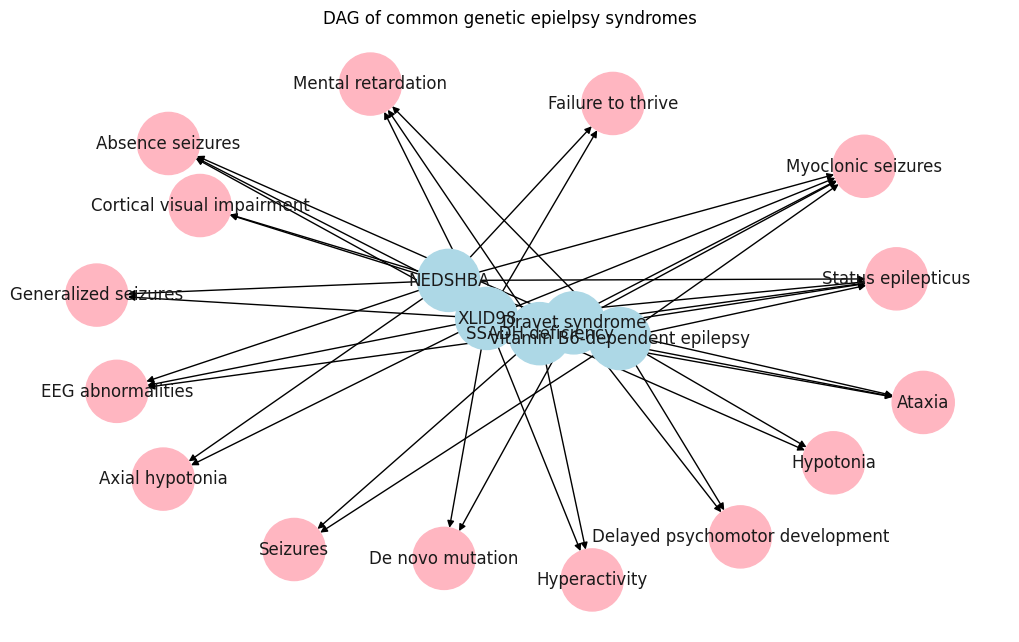

In [40]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for diagnosis and symptoms
for diagnosis in df_s1_filtered['preferredTitle']:
    G.add_node(diagnosis, color='#ADD8E6')

# Symptoms nodes
for col in df_s1_filtered.columns[1:]:
    G.add_node(col, color='#FFB6C1')

# Add edges from diagnosis to symptoms
for index, row in df_s1_filtered.iterrows():
    diagnosis = row['preferredTitle']
    for col in df_s1_filtered.columns[1:]:
        if row[col] == 1:
            G.add_edge(diagnosis, col)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000)
plt.title('DAG of common genetic epielpsy syndromes')

# Use Seaborn style
sns.set()

# Save the image
plt.savefig('DAG1_CommonSymptoms.png')

# Show the plot
plt.show()

### 2.62 Sample 2

In [41]:
# Create a list of diagnosis from query sample 2
sample2 = ['RETT SYNDROME; RTT',
           'MEGALENCEPHALY-POLYMICROGYRIA-POLYDACTYLY-HYDROCEPHALUS SYNDROME 1; MPPH1',
           'COWDEN SYNDROME 1; CWS1',
           'SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 29; SCAR29']

In [42]:
# Create a dataframe based on the list
df_s2 = df6.loc[df6['preferredTitle'].isin(sample2)]

# Only keep associated symptoms
df_s2 = df_s2.loc[:, (df_s2 != 0).any(axis=0)]

# Check results
df_s2

,preferredTitle,Birdlike facies,Abnormal smooth pursuit,Acral keratoses,Angioid streaks,Approximately 80% of CS patients have PTEN mutations,Asperger-like features,Atrial septal defect,Autistic behaviors,Axial hypotonia,...,Varicocele,Vascular anomalies,Vascular ring,Vasomotor disturbance,Ventricles slightly enlarged,Ventricular septal defect,Virginal hyperplasia,Vulvar cysts,Wide Sylvian fissures with incomplete opercularization,Wide palpebral fissures
406,COWDEN SYNDROME 1; CWS1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
650,RETT SYNDROME; RTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1035,MEGALENCEPHALY-POLYMICROGYRIA-POLYDACTYLY-HYDR...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1527,"SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 29...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Define the mapping of old values to new values
value_mapping2 = {
    'RETT SYNDROME; RTT': 'Rett syndrome',
    'MEGALENCEPHALY-POLYMICROGYRIA-POLYDACTYLY-HYDROCEPHALUS SYNDROME 1; MPPH1': 'MPPH1',
    'COWDEN SYNDROME 1; CWS1': 'Cowden syndrome',
    'SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 29; SCAR29': 'SCA-29'
}

# Change values in the "preferredTitle" column using the mapping
df_s2['preferredTitle'] = df_s2['preferredTitle'].map(value_mapping2)

# Check the updated DataFrame
df_s2

,preferredTitle,Birdlike facies,Abnormal smooth pursuit,Acral keratoses,Angioid streaks,Approximately 80% of CS patients have PTEN mutations,Asperger-like features,Atrial septal defect,Autistic behaviors,Axial hypotonia,...,Varicocele,Vascular anomalies,Vascular ring,Vasomotor disturbance,Ventricles slightly enlarged,Ventricular septal defect,Virginal hyperplasia,Vulvar cysts,Wide Sylvian fissures with incomplete opercularization,Wide palpebral fissures
406,Cowden syndrome,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
650,Rett syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1035,MPPH1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1527,SCA-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Calculate the sum of values in each column except the first one
column_sums = df_s2.iloc[:, 1:].sum()

# Filter out the columns with sum greater than 1
filtered_columns = column_sums[column_sums > 1]

# Select the original DataFrame with the filtered columns
df_s2_filtered = df_s2[['preferredTitle'] + filtered_columns.index.tolist()]

# Check results
df_s2_filtered

,preferredTitle,Axial hypotonia,Dystonia,Frontal bossing,Gait ataxia,Kyphosis,"Mental retardation, profound",Scoliosis,Seizures
406,Cowden syndrome,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
650,Rett syndrome,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1035,MPPH1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1527,SCA-29,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


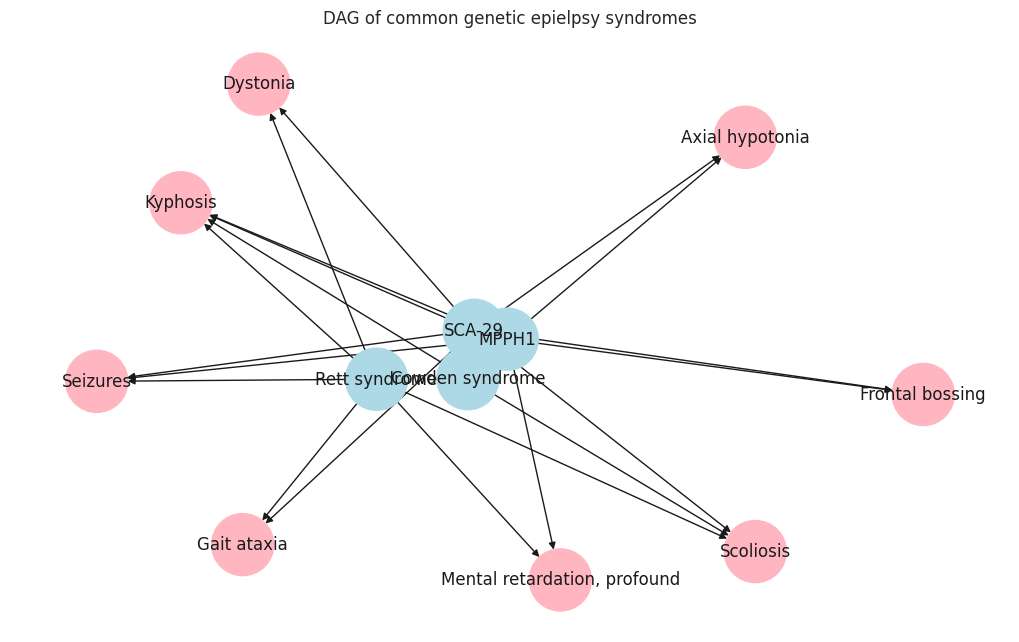

In [45]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for diagnosis and symptoms
for diagnosis in df_s2_filtered['preferredTitle']:
    G.add_node(diagnosis, color='#ADD8E6')

# Symptoms nodes
for col in df_s2_filtered.columns[1:]:
    G.add_node(col, color='#FFB6C1')

# Add edges from diagnosis to symptoms
for index, row in df_s2_filtered.iterrows():
    diagnosis = row['preferredTitle']
    for col in df_s2_filtered.columns[1:]:
        if row[col] == 1:
            G.add_edge(diagnosis, col)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000)
plt.title('DAG of common genetic epielpsy syndromes')

# Use Seaborn style
sns.set()

# Save the image
plt.savefig('DAG2_CommonSymptoms.png')

# Show the plot
plt.show()

# 3 Data Export

In [46]:
# Export the expanded dataframe
# df_protege.to_excel('df_protege.xlsx', index=False)

In [47]:
df6.to_csv('/content/drive/My Drive/Colab Notebooks/df6.csv', index=False)